<a href="https://colab.research.google.com/github/Yashas08-RY/Python-ML-/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

GENERATED IMAGE:


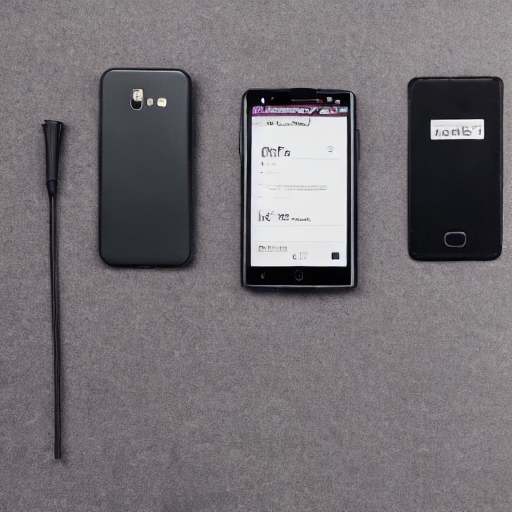

In [18]:
import torch
from diffusers import StableDiffusionPipeline

if torch.cuda.is_available():
  pipe = StableDiffusionPipeline.from_pretrained(
      "runwayml/stable-diffusion-v1-5",
      torch_dtype=torch.float16
  )
  pipe = pipe.to("cuda")
  prompt = "phone"
  image = pipe(prompt).images[0]
  image.save("lion.png")
  print("GENERATED IMAGE:")
  display(image)
else:
  print("WARNING!: this code requires a GPU to run quickly. Please use Google Colab and set runtime -> change runtime type to T4 GPU.")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (80 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', masterpiece .']


  0%|          | 0/50 [00:00<?, ?it/s]

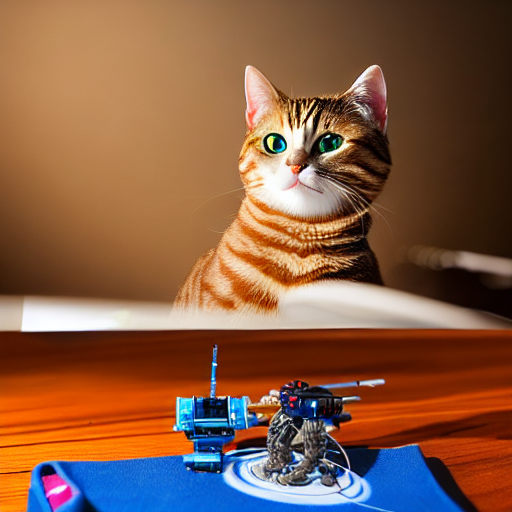

In [13]:
import torch
from diffusers import StableDiffusionPipeline
from IPython.display import display

if not torch.cuda.is_available():
    exit("GPU not available. Please enable GPU runtime.")

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

positive_prompt = """
A highly detailed, photorealistic image of a futuristic robot artist,
meticulously painting a hyperrealistic portrait of a fluffy tabby cat.
The robot has glowing blue eyes and delicate manipulators holding a fine paintbrush.
The cat is sitting patiently on a velvet cushion.
Studio lighting, cinematic, ultra-sharp focus, professional photography,
artstation, 8k, award-winning, masterpiece.
"""

negative_prompt = """
blurry, distorted, grainy, low-res, poor quality, bad art, deformed,
ugly, disfigured, cartoon, sketch, painting (unless specified), monochrome, grayscale, watermark,
"""

generator = torch.Generator(device="cuda").manual_seed(42)

image = pipe(
    prompt=positive_prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=50,
    guidance_scale=9,
    generator=generator,
).images[0]

display(image)

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")
def analyze_sentiment(text):
    result = sentiment_pipeline(text)[0]
    label = result['label']
    score = result['score']
    return f"sentiment: {label}, (confidence: {score})"

while True:
    user_input = input("Enter a sentence for sentiment ananlysis (or 'exit' to quit): ").strip()
    if user_input.lower() == 'exit':
        break
    result = analyze_sentiment(user_input)
    print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0


Enter a sentence (or 'exit' to quit): happy
sentiment: POSITIVE, (confidence: 0.9998753070831299)
Enter a sentence (or 'exit' to quit): sad
sentiment: NEGATIVE, (confidence: 0.999589741230011)
Enter a sentence (or 'exit' to quit): i am feeling  lonely 
sentiment: NEGATIVE, (confidence: 0.9988576173782349)
Enter a sentence (or 'exit' to quit): i got good marks in exam
sentiment: POSITIVE, (confidence: 0.9996336698532104)
